<a href="https://colab.research.google.com/github/cristobalroldan/TareaGIO/blob/main/TareaGio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import math

m = 100
n = 2
a = np.random.uniform(-10,10, size=(m,n))
np.around(a,2,a)
b = np.random.uniform(-10,10, m)
np.around(b,2,b)

array([-0.03, -5.98,  5.7 ,  0.26, -2.41,  5.17,  6.99, -1.19, -1.37,
        7.06,  0.16, -1.43, -6.4 ,  9.39, -0.38, -3.14,  5.98,  7.77,
       -1.07,  0.61,  2.76, -3.07, -9.67, -3.73,  2.22,  9.64, -3.67,
        8.35, -5.86,  6.04, -6.56,  3.24,  0.23, -9.39, -8.34, -9.51,
       -5.91, -1.17, -3.18, -2.15, -9.61,  1.23, -7.96, -6.66, -2.  ,
        4.91,  7.43,  4.76, -5.2 , -5.13, -2.92,  8.36,  0.51,  0.46,
        4.21, -4.76, -4.61,  6.03, -5.84,  7.58,  5.36, -1.96,  5.2 ,
       -4.39,  7.58,  1.55,  5.09,  0.14,  6.46,  3.63, -5.09, -9.84,
       -6.33,  7.5 , -9.77,  4.27,  1.66, -7.75, -9.13,  4.47, -3.66,
       -3.09, -5.44,  0.77, -8.99, -0.95, -9.67,  4.67, -7.57, -5.32,
        4.38,  9.13,  4.12, -0.69, -0.94, -8.4 , -4.08,  2.88, -1.53,
        3.04])

In [11]:
x = np.random.randint(1,5, n)
print(x)

[3 3]


In [12]:

def f(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = a[i-1][j-1]*x[j-1] + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    return np.log(totalsum)


In [13]:
def fsinLog(x): 
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = a[i-1][j-1]*x[j-1] + b[i-1]
            totalexp = totalexp + aux
            j = j + 1
        aux2 = math.exp(totalexp)
        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    return totalsum

In [14]:
def fdx(x):
    i = 1
    totalsum = 0
    while i <= m:
        totalexp = 0
        j =1
        while j <= n:
            aux = a[i-1][j-1]*x[j-1] + b[i-1]
            totalexp = totalexp + aux
            aux2 = math.exp(totalexp)*a.item(i-1,j-1)
            # print(a.item(i-1,j-1))
            j = j +1

        totalsum = totalsum + aux2
        # print(totalsum)
        i = i + 1
    
    return (1/fsinLog(x))*totalsum

# fdx(x)

In [15]:
def backtrack4(x0, f, fdx, t = 1, alpha = 0.4, beta = 0.9):
    
    point = x0 #Necessary to ensure matrix form
    # print(point)
    while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
         t *= beta
        #  print(t)
    return t

# backtrack4(x, f, fdx)

In [16]:
def grad(x0, max_iter):
    iter = 1
    
    while (np.linalg.norm(np.array(fdx(x0))) > 0.000001):
    #Find stepsize by backtracking
        t = backtrack4(x0, f, fdx) #Step Size
        x0 = x0 - np.dot(t, np.transpose(fdx(x0)))
        #Calculate New Value of Function
        print(x0, f(x0), fdx(x0), iter)
        iter += 1
        if iter > max_iter:
            break
    return x0, f(x0), iter

In [17]:
grad(x, 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


[-1.88395519 -1.88395519] 39.91843771199638 -9.23766269941881 1
[0.46413472 0.46413472] 26.441694187719015 9.14243603300375 2
[-0.43618578 -0.43618578] 22.41348777163762 -7.266901565477124 3
[0.03333468 0.03333468] 20.376969022339676 6.662319246528188 4
[-0.13343353 -0.13343353] 19.88041453216578 -2.45919042888912 5
[-0.05743678 -0.05743678] 19.78366130253916 1.7894063358681376 6
[-0.08682457 -0.08682457] 19.76069763496863 -0.06733381945846734 7
[-0.07434748 -0.07434748] 19.76008664828075 0.7018253541383023 8
[-0.07986043 -0.07986043] 19.758524599474832 0.3571713441221546 9
[-0.07986043 -0.07986043] 19.758524599474832 0.3571713441214586 10
[-0.07986043 -0.07986043] 19.758524599474832 0.3571713441207621 11
[-0.07986043 -0.07986043] 19.758524599474832 0.35717134412005186 12
[-0.07986043 -0.07986043] 19.758524599474832 0.3571713441193492 13
[-0.07986043 -0.07986043] 19.758524599474832 0.3571713441186445 14
[-0.07986043 -0.07986043] 19.75852459947483 0.3571713441164138 15
[-0.07986043 -0.0

(array([-0.07986043, -0.07986043]), 19.758524599474825, 51)

**GRÁFICAS**

In [63]:
x0= np.arange(-0.2, 0.2 , 0.0001)
#print(x0)
y=[]
for i in x0:
    y.append(f([0.01,i]))
    #print(f([0.1,i]))
   
 

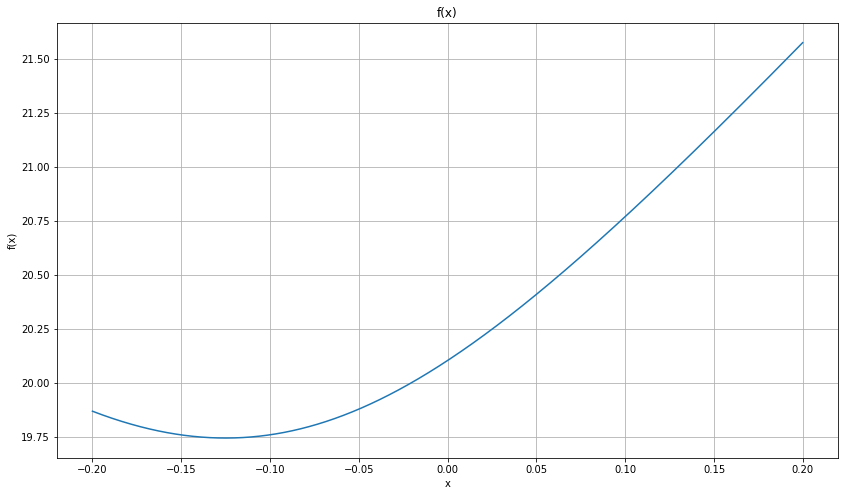

19.74352107841387


In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(x0,y,'')
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.axis([0, 2450, 0, 45])
plt.grid(True)
plt.title('f(x)')
# [xmin, xmax, ymin, ymax] 
plt.show()
print(min(y))   